In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 범주-연속-레이블로 나누기

In [6]:
import pandas as pd
data=pd.read_csv('/content/drive/My Drive/PyDataML/vote.csv', encoding='UTF-8')
data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [10]:
X1=data[['gender', 'region']]
X1.head()

,gender,region
0,1,4
1,1,5
2,1,3
3,2,1
4,1,1


In [11]:
X2=data[['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention']]
X2.head()

,edu,income,age,score_gov,score_progress,score_intention
0,3,3,3,2,2,4.0
1,2,3,3,2,4,3.0
2,1,2,4,1,3,2.8
3,2,1,3,5,4,2.6
4,1,2,4,4,3,2.4


In [9]:
y=data[['vote', 'parties']]
y.head()

,vote,parties
0,1,2
1,0,3
2,1,4
3,1,1
4,1,1


# 범주형 특성의 웟핫인코딩 변환

In [14]:
X1['gender'] = X1['gender'].replace([1,2], ['male', 'female'])
X1['region'] = X1['region'].replace([1,2,3,4,5], ['Sudo', 'Chungcheung', 'Honam', 'Youngnam', 'Others'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
X1.head()

,gender,region
0,male,Youngnam
1,male,Others
2,male,Honam
3,female,Sudo
4,male,Sudo


In [16]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  211 non-null    object
 1   region  211 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


In [18]:
X1_dum=pd.get_dummies(X1)
X1_dum.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0


# 연속형 특성의 Scaling

In [19]:
X2.describe()

,edu,income,age,score_gov,score_progress,score_intention
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900
std,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000
50%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000
max,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65510aa198>,
      dtype=object)

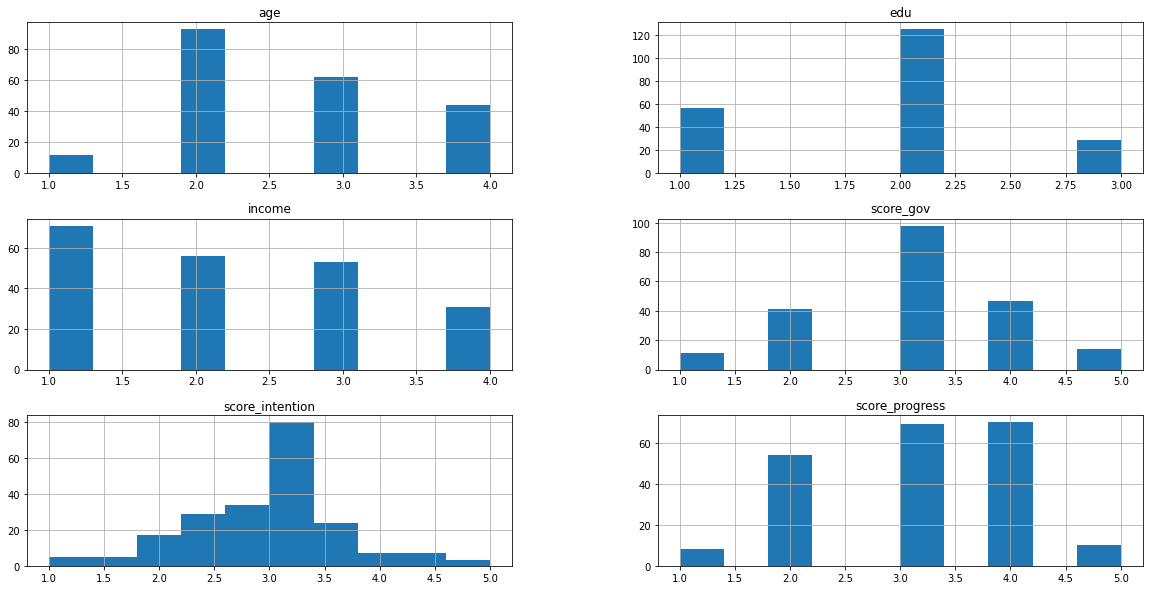

In [21]:
import matplotlib.pyplot as plt
pd.DataFrame(X2).hist(figsize=(20,10))

# Min-Max Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
scaler1

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
X2.head()

,edu,income,age,score_gov,score_progress,score_intention
0,3,3,3,2,2,4.0
1,2,3,3,2,4,3.0
2,1,2,4,1,3,2.8
3,2,1,3,5,4,2.6
4,1,2,4,4,3,2.4


In [27]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   edu              211 non-null    int64  
 1   income           211 non-null    int64  
 2   age              211 non-null    int64  
 3   score_gov        211 non-null    int64  
 4   score_progress   211 non-null    int64  
 5   score_intention  211 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 10.0 KB


In [28]:
scaler1.fit(X2)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [30]:
X_scaled1=scaler1.transform(X2)
X_scaled1

array([[1.        , 0.66666667, 0.66666667, 0.25      , 0.25      ,
        0.75      ],
       [0.5       , 0.66666667, 0.66666667, 0.25      , 0.75      ,
        0.5       ],
       [0.        , 0.33333333, 1.        , 0.        , 0.5       ,
        0.45      ],
       ...,
       [0.5       , 0.        , 0.33333333, 0.5       , 0.5       ,
        0.4       ],
       [0.5       , 0.66666667, 1.        , 0.5       , 0.25      ,
        0.75      ],
       [0.5       , 0.33333333, 0.33333333, 0.5       , 0.5       ,
        0.7       ]])

In [32]:
pdXscaled1=pd.DataFrame(X_scaled1)
pdXscaled1.head()

,0,1,2,3,4,5
0,1.0,0.666667,0.666667,0.25,0.25,0.75
1,0.5,0.666667,0.666667,0.25,0.75,0.50
2,0.0,0.333333,1.000000,0.00,0.50,0.45
3,0.5,0.000000,0.666667,1.00,0.75,0.40
4,0.0,0.333333,1.000000,0.75,0.50,0.35


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6545c16400>,
      dtype=object)

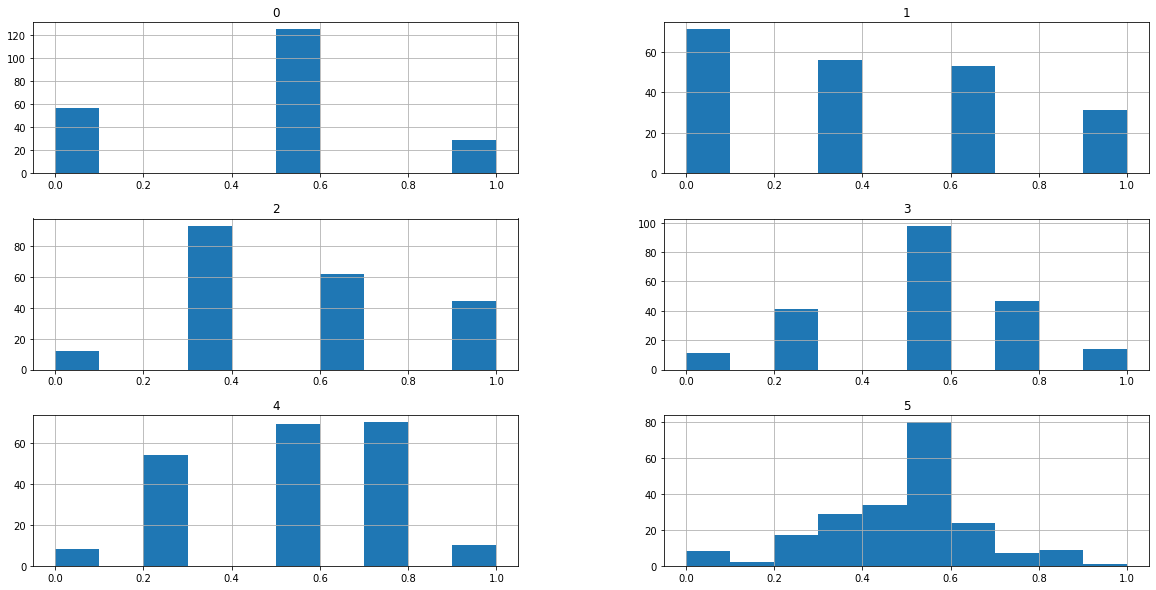

In [33]:
pdXscaled1.hist(figsize=(20,10))

In [34]:
pdXscaled1.describe()

,0,1,2,3,4,5
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.433649,0.402844,0.551343,0.514218,0.523697,0.477725
std,0.312982,0.355475,0.290724,0.236113,0.240352,0.181269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.333333,0.500000,0.250000,0.350000
50%,0.500000,0.333333,0.666667,0.500000,0.500000,0.500000
75%,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Standardization 스케일링

In [36]:
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()
scaler2.fit(X2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
X_scaled2=scaler2.transform(X2)
X_scaled2

array([[ 1.81383603,  0.74393617,  0.39762094, -1.12169405, -1.14144033,
         1.50561719],
       [ 0.21249962,  0.74393617,  0.39762094, -1.12169405,  0.94378832,
         0.12317495],
       [-1.38883679, -0.19600713,  1.54690888, -2.18302789, -0.098826  ,
        -0.1533135 ],
       ...,
       [ 0.21249962, -1.13595044, -0.75166699, -0.06036022, -0.098826  ,
        -0.42980195],
       [ 0.21249962,  0.74393617,  1.54690888, -0.06036022, -1.14144033,
         1.50561719],
       [ 0.21249962, -0.19600713, -0.75166699, -0.06036022, -0.098826  ,
         1.22912874]])

In [42]:
pdXscaled2=pd.DataFrame(X_scaled2)
pdXscaled2.describe()

,0,1,2,3,4,5
count,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02
mean,-3.499044e-17,1.360155e-16,3.635849e-16,-1.473939e-16,-1.237820e-16,-1.967883e-16
std,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00
min,-1.388837e+00,-1.135950e+00,-1.900955e+00,-2.183028e+00,-2.184055e+00,-2.641710e+00
25%,-1.388837e+00,-1.135950e+00,-7.516670e-01,-6.036022e-02,-1.141440e+00,-7.062904e-01
50%,2.124996e-01,-1.960071e-01,3.976209e-01,-6.036022e-02,-9.882600e-02,1.231749e-01
75%,2.124996e-01,7.439362e-01,3.976209e-01,1.000974e+00,9.437883e-01,6.761518e-01
max,1.813836e+00,1.683879e+00,1.546909e+00,2.062307e+00,1.986403e+00,2.888059e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6545c09128>,
      dtype=object)

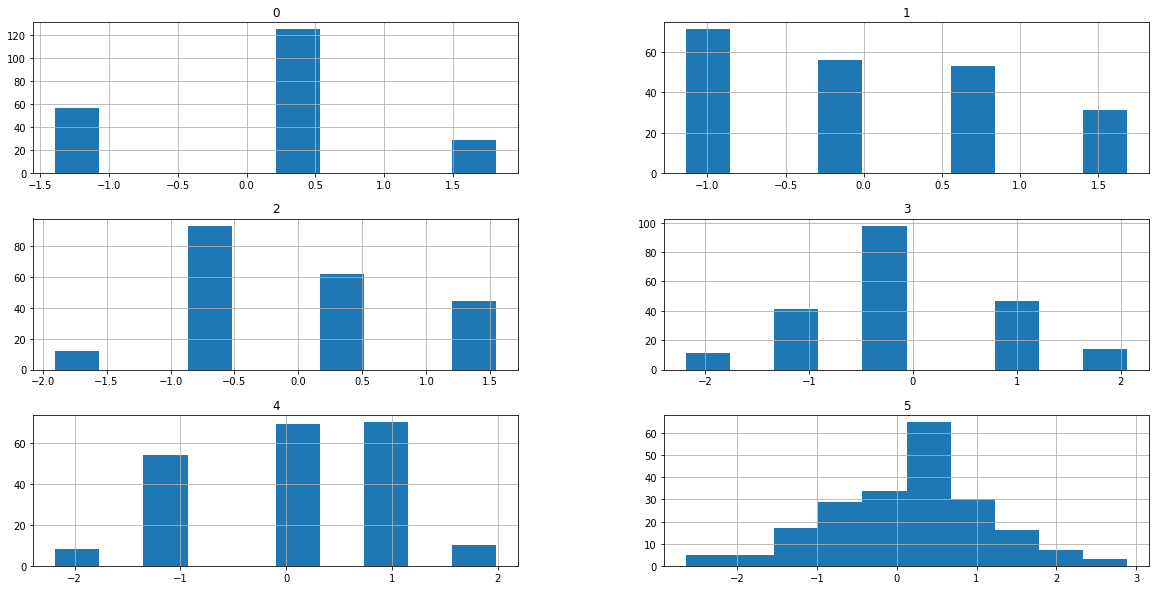

In [43]:
pdXscaled2.hist(figsize=(20,10))

# 자료 통합 및 저장하기

In [0]:
import pandas as pd

In [0]:
X_scaled=pd.DataFrame(X_scaled1)
X_scaled.columns=['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention']

In [47]:
Fvote=pd.concat([X1_dum, X_scaled, y], axis=1)
Fvote.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,1.0,0.666667,0.666667,0.25,0.25,0.75,1,2
1,0,1,0,0,1,0,0,0.5,0.666667,0.666667,0.25,0.75,0.50,0,3
2,0,1,0,1,0,0,0,0.0,0.333333,1.000000,0.00,0.50,0.45,1,4
3,1,0,0,0,0,1,0,0.5,0.000000,0.666667,1.00,0.75,0.40,1,1
4,0,1,0,0,0,1,0,0.0,0.333333,1.000000,0.75,0.50,0.35,1,1


In [0]:
Fvote.to_csv('/content/drive/My Drive/PyDataML/Fvote.csv', sep=',', encoding='utf-8')